In [1]:
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
from cleanupFile import cleanUp

In [2]:
def count_func(df1: pd.DataFrame,param,dict):
    for i,row in df1.iterrows():
        dict[row['BOROUGH']][0]+=row['NUMBER OF PEDESTRIANS '+param]
        dict[row['BOROUGH']][1]+=row['NUMBER OF CYCLIST '+param]
        dict[row['BOROUGH']][2]+=row['NUMBER OF MOTORIST '+param]

In [3]:
def plot_func(dict, param):
       
    df2=pd.DataFrame.from_dict(dict,orient='index',columns=['PEDESTRIANS '+param,'CYCLIST '+param,'MOTORIST '+param])

    plt.bar(df2.index,df2['PEDESTRIANS '+param],color='r')
    plt.bar(df2.index,df2['CYCLIST '+param],bottom=df2['PEDESTRIANS '+param],color='b')
    plt.bar(df2.index,df2['MOTORIST '+param],bottom=df2['CYCLIST '+param]+df2['PEDESTRIANS '+param],color='g')
    plt.xlabel("Boroughs")
    param1 = "Deaths" if param=="KILLED" else "Injuries"
    plt.ylabel(param1)
    plt.legend(["PEDESTRIANS "+param, "CYCLIST "+param, "MOTORIST "+param])
    plt.title(f"Borough and {param1}")
    plt.show()

/tmp/ipykernel_5157/2793844954.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset1.csv")
/tmp/ipykernel_5157/2793844954.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


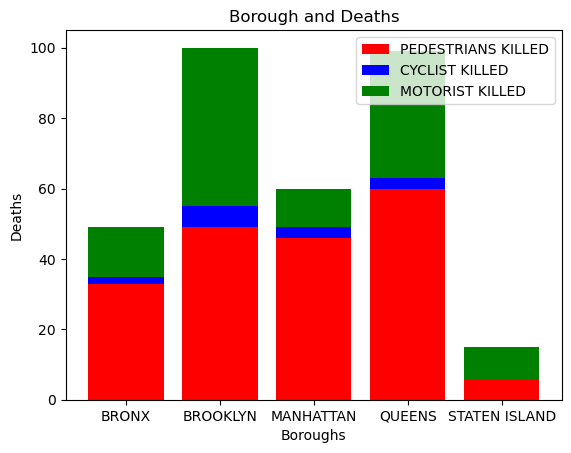

/tmp/ipykernel_5157/2793844954.py:13: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


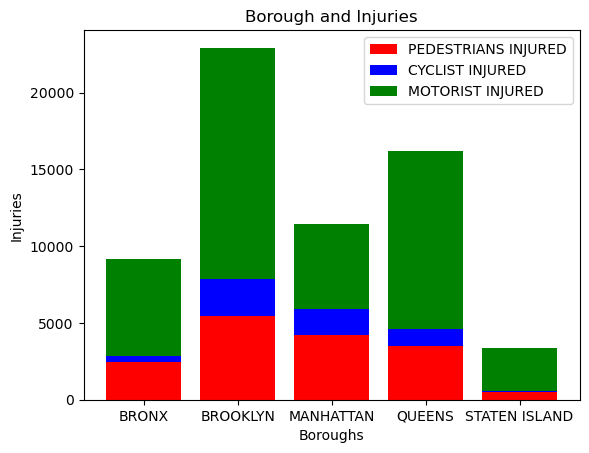

In [4]:
df = pd.read_csv("Dataset1.csv")
cleanUp(df)
groups = df.groupby(by=['BOROUGH'])

dict1 = {}
for name, group in groups:
    dict1[name] = [0,0,0]

count_func(df,"KILLED",dict1)
plot_func(dict1, "KILLED")

dict2 = {}
for name, group in groups:
    dict2[name] = [0,0,0]

count_func(df,"INJURED",dict2)
plot_func(dict2, "INJURED")